In [7]:
import matplotlib.pyplot as plt
import numpy as np

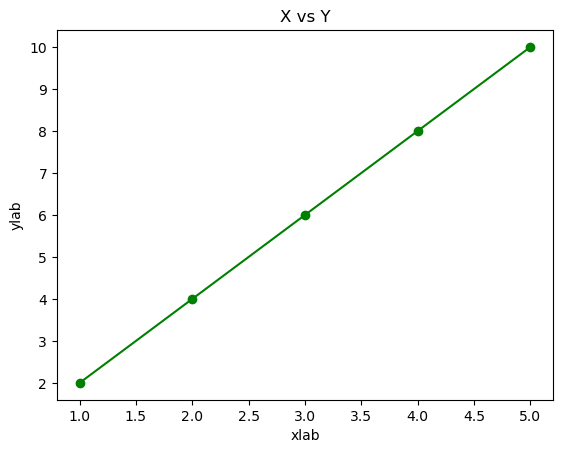

In [5]:
x=np.array([1,2,3,4,5])
y=x*2
plt.plot(x,y,color='green', marker='o')
plt.xlabel("xlab")
plt.ylabel("ylab")
plt.title('X vs Y')
plt.show()

In [40]:
import pandas as pd
data=pd.read_csv('GlobalLandTemperaturesByCity.csv')
data.info
data=data.dropna()

In [13]:
data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [41]:
data['dt']=pd.to_datetime(data['dt'], errors='coerce')
data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

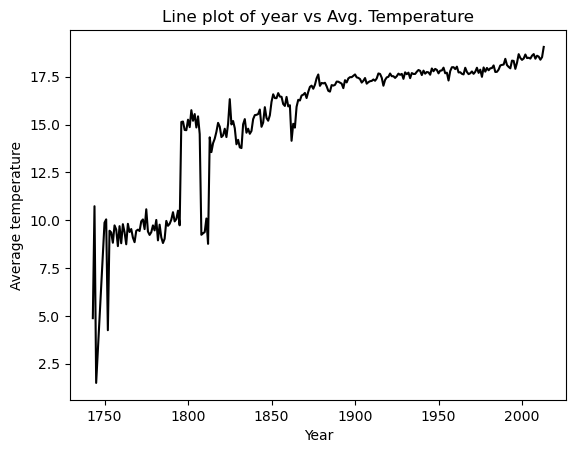

In [85]:
data['year']=data['dt'].dt.year
x=data.groupby('year')['AverageTemperature'].mean().reset_index()
plt.plot(x['year'],x['AverageTemperature'],color='black')
plt.xlabel("Year")
plt.ylabel("Average temperature")
plt.title('Line plot of year vs Avg. Temperature')
plt.show()

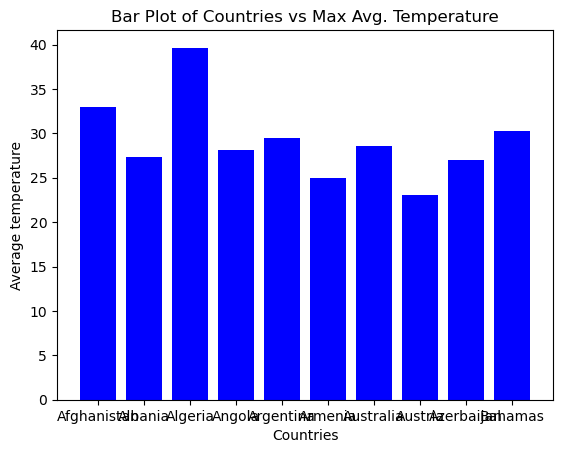

In [56]:
x=data.groupby('Country')['AverageTemperature'].max().reset_index()
plt.bar(x.iloc[0:10,0], x.iloc[0:10,1], color='blue')
plt.xlabel("Countries")
plt.ylabel("Average temperature")
plt.title('Bar Plot of Countries vs Max Avg. Temperature')
plt.show()

In [52]:
data.head().reset_index()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
2,6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
3,7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
4,8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


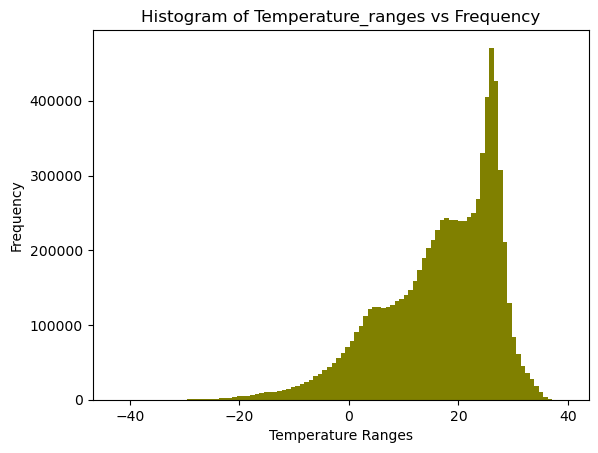

In [76]:

plt.hist(data['AverageTemperature'], bins=100, color='olive')
plt.xlabel("Temperature Ranges")
plt.ylabel("Frequency")
plt.title('Histogram of Temperature_ranges vs Frequency')
plt.show()

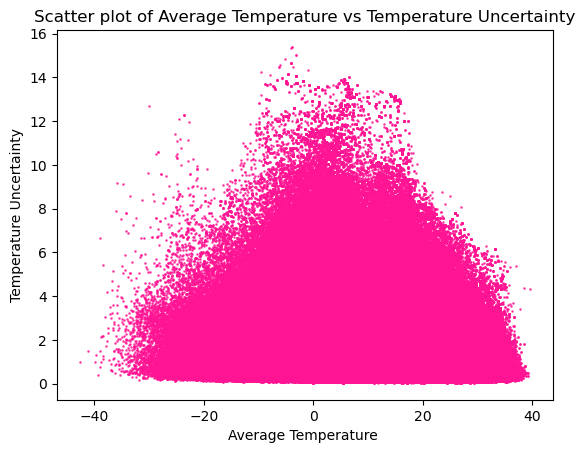

In [77]:
plt.scatter(data['AverageTemperature'], data['AverageTemperatureUncertainty'], color='deeppink', s=0.75, alpha=0.75)
plt.xlabel("Average Temperature ")
plt.ylabel("Temperature Uncertainty")
plt.title('Scatter plot of Average Temperature vs Temperature Uncertainty')
plt.show()

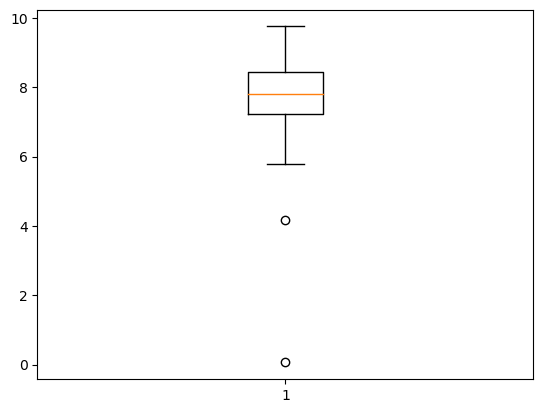

In [96]:
z=data[data['Country']=='Denmark']
e=z.groupby('year')['AverageTemperature'].mean().reset_index()
plt.boxplot(e['AverageTemperature'])
plt.show()

In [97]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [99]:
tips.shape

(244, 7)

In [100]:
tips.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [101]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [102]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [103]:
tips.size

1708

Text(0.5, 1.0, 'Distribution of total bills')

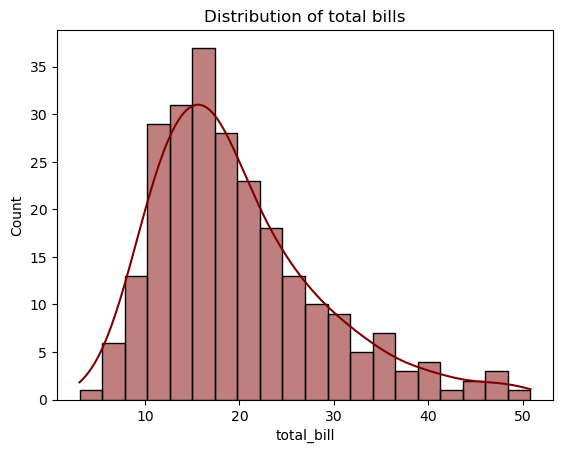

In [114]:
#Categorical plots

#1:Histogram shows the distribution of a single variable:sns.histplot

sns.histplot(tips['total_bill'], bins=20, color='maroon', kde=True)
#plt.xlabel("Bill Total")
plt.title('Distribution of total bills')


Text(0.5, 1.0, 'KDE PLOT')

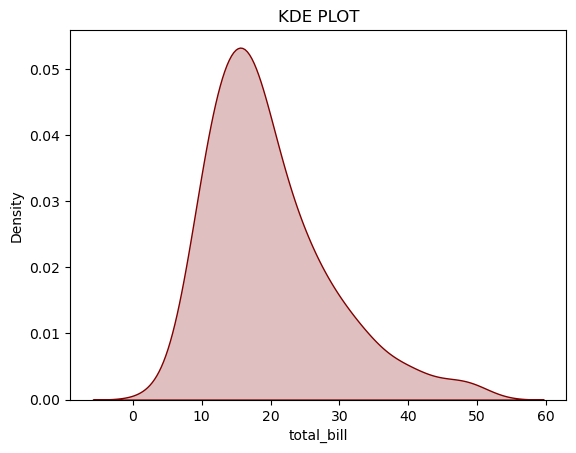

In [120]:
#2.Kernel Density Estimation(KDE) visualizes the probability density of a variable 
sns.kdeplot(tips['total_bill'], fill=True,color='maroon')
plt.title('KDE PLOT')

Text(0.5, 1.0, 'BARPLOT')

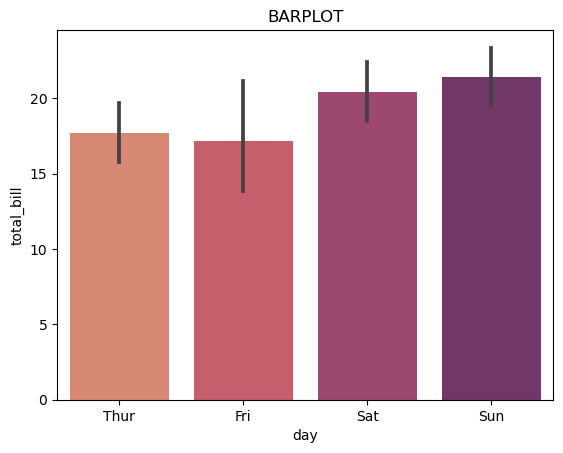

In [127]:
#barplot:Displays the mean of a quantitative variable for different categories

sns.barplot(x=tips['day'],y=tips['total_bill'],color='maroon', palette='flare')
plt.title('BARPLOT')

Text(0.5, 1.0, 'BOXPLOT')

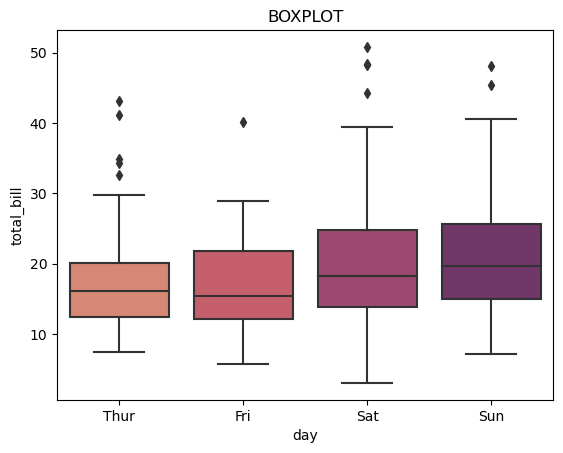

In [128]:
sns.boxplot(x=tips['day'],y=tips['total_bill'],color='maroon', palette='flare')
plt.title('BOXPLOT')

Text(0.5, 1.0, 'SCATTERPLOT')

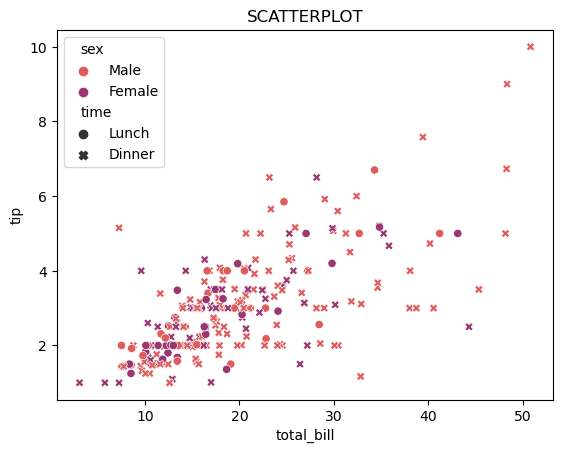

In [132]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],color='maroon', palette='flare', hue=tips['sex'], style=tips['time'])
plt.title('SCATTERPLOT')

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'PAIR PLOT')

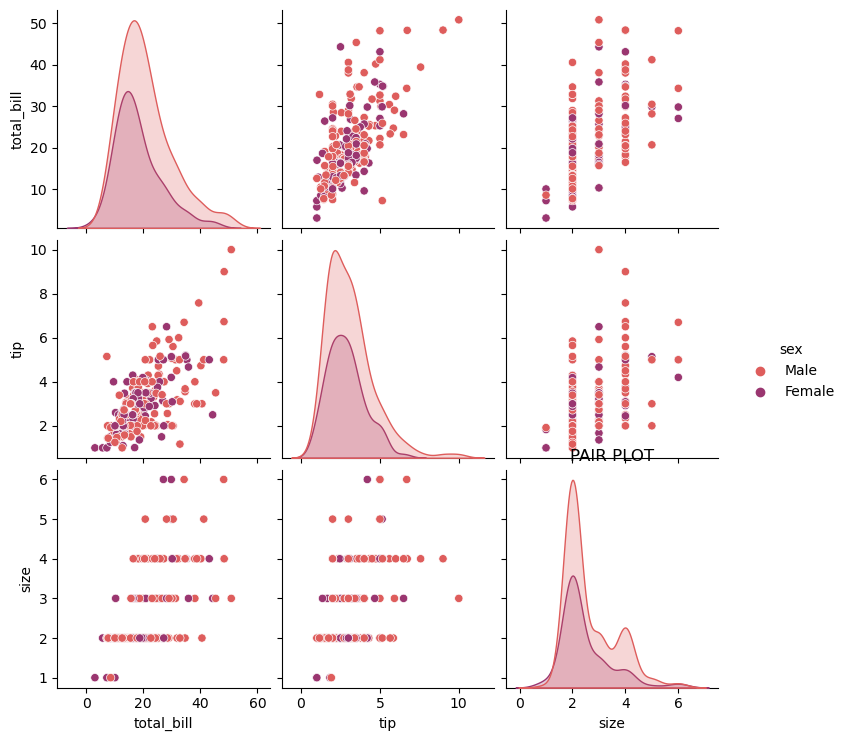

In [146]:
sns.pairplot(data=tips, palette='flare', hue='sex')
plt.title('PAIR PLOT')

Text(0.5, 1.0, 'LINE PLOT')

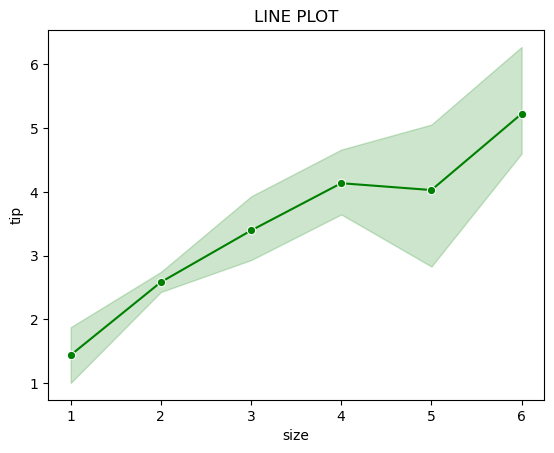

In [149]:
sns.lineplot(x=tips['size'],y=tips['tip'],color='green', marker='o')
plt.title('LINE PLOT')

Text(0.5, 1.0, 'LINE PLOT')

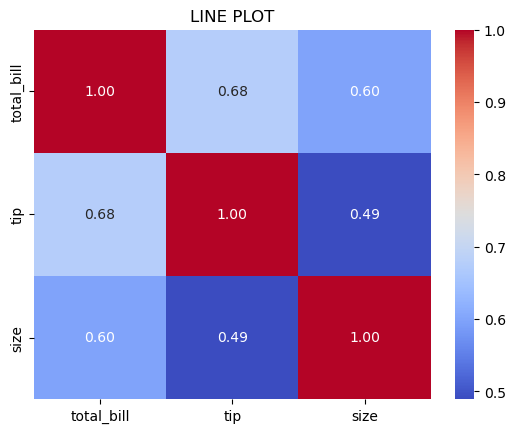

In [151]:
numerical_tips=tips.select_dtypes(include=['float64', 'int64'])
corr_mat=numerical_tips.corr()
sns.heatmap(corr_mat,annot=True,cmap='coolwarm', fmt='.2f')
plt.title('HEAT MAP')

In [5]:
import pandas as pd
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


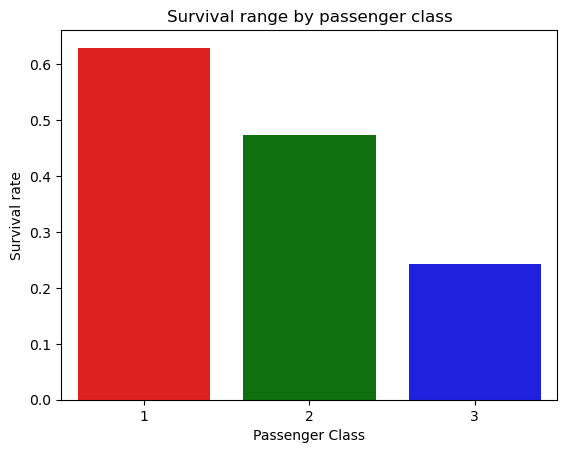

In [8]:
sns.barplot(data=train,x='Pclass',y='Survived', errorbar=None, palette=['red','green','blue'])
plt.title("Survival range by passenger class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival rate")
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

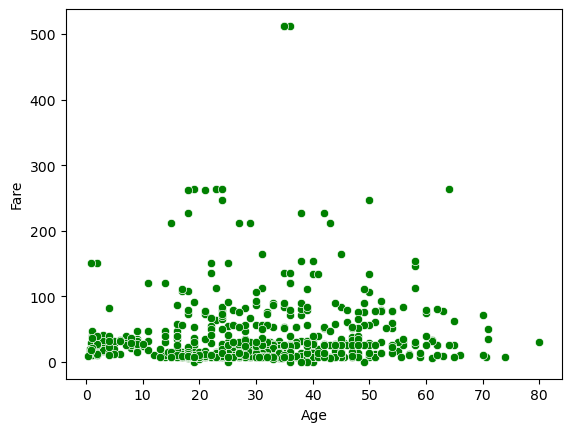

In [14]:
sns.scatterplot(data=train, x='Age', y='Fare', color='green')

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'PAIR PLOT')

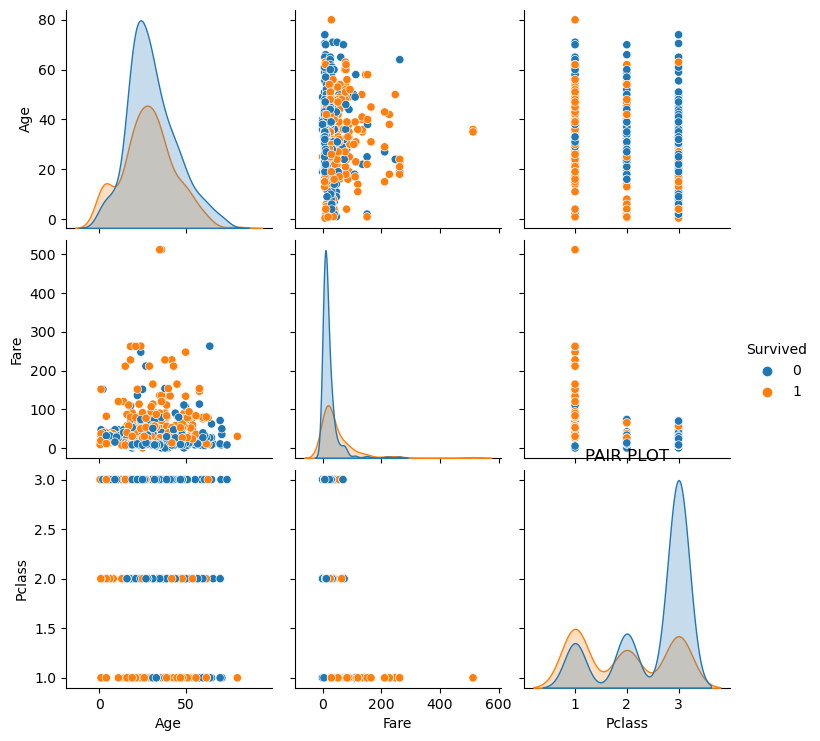

In [23]:
selected_columns=train[['Age', 'Fare','Pclass', 'Survived']]
sns.pairplot(data=selected_columns, hue='Survived')
plt.title('PAIR PLOT')

In [24]:
train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Text(0.5, 1.0, 'HEAT MAP')

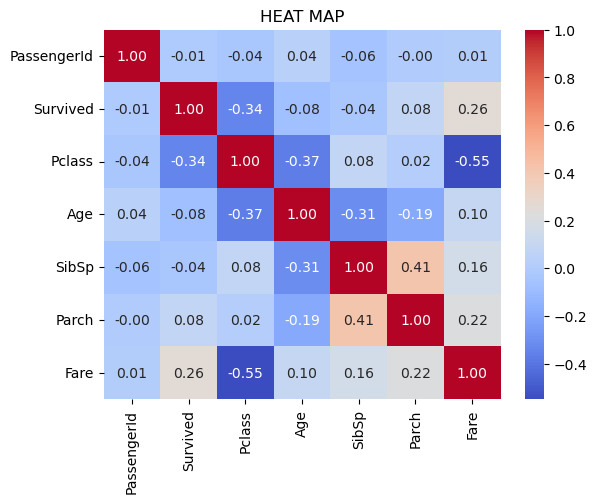

In [27]:
numerical_tips1=train.select_dtypes(include='number')
corr_mat1=numerical_tips1.corr()
sns.heatmap(corr_mat1,annot=True,cmap='coolwarm', fmt='.2f')
plt.title('HEAT MAP')